In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '0'
AG = '0'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 113
INFO:root:Data length after removing invalid tweets: 33
INFO:root:Original data length: 9000
INFO:root:After applying filters: 1316
INFO:root:Data length after removing invalid tweets: 518
INFO:root:Explained variance of the SVD step: 38%


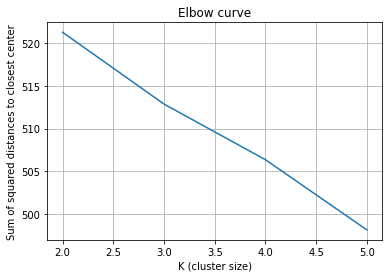

In [3]:
%matplotlib inline
# Lower values are better
km.plot_elbow_curve(max_k=5, X=X)

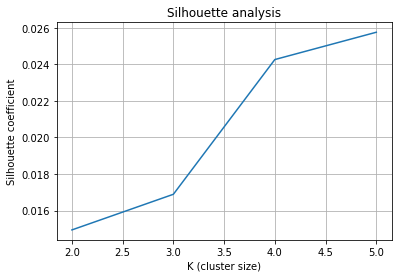

In [4]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=5, X=X)

In [5]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 bitches refugees illegal immigration country don right like ladies girl

Cluster 1:
 bitch hoes hoe shit cunt fuck whore bitches ass pussy

Cluster 2:
 girls just know immigrants guys let don feminists want good

Cluster 3:
 woman does difference like bitch trying good didn likes rape

Cluster 4:
 women like hysterical bitch men dick don want just hoe



In [6]:
NUM_SAMPLES=5
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [223 386 304 414 388]
['5033', 'What do you call a woman who has lost 95% of her intelligence? Divorced', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5752', "If you slow the video down you can see the problem..... Yep she's a woman #WomenSuck", '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5517', 'What is the difference between a woman and a catfish? One is a bottom feeding scum sucker and one is a fish', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5808', 'Teaching a woman to drive is like teaching a rock to swim. #WomenSuck', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['5759', 'It figures the hurricane is named after a woman. They always fuck everything up #Sandy #Bitch #WomenSuck', '1', '0', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']


Cluster 1: